In [2]:
import numpy as np
import os

DIR = "/Users/accheng/Documents/ray_source/experimental"


approx_nf = {}
approx_1f = {}
gc_nf = {}
gc_1f = {}
exact_nf = {}
exact_1f = {}

def load(filename):
    results = []
    num_over_1000 = 0
    max_frame = -1
    with open(filename, 'r') as f:
        for line in f.readlines():
#             print(line)
            line = line.strip()
            frame, latency = line.split(' ')
            frame = int(frame)
            latency = float(latency)
#             print(frame, " ", latency)
            results.append((frame, latency))
#             print(results)
            if frame > max_frame:
                max_frame = frame
#     print(results)
    start = 0
    end = max_frame
    results = [(latency * 1000) for frame, latency in results if frame > start and frame < end] #
    print(filename)
    print("\tlength", len(results))
    print("\tmean", np.mean(results))
    print("\tp50:", np.percentile(results, 50))
    print("\tp90:", np.percentile(results, 90))
    print("\tp99:", np.percentile(results, 99))
    print("\tp100:", np.max(results))
    print("\tstd:", np.std(results))

    return results

for f in os.listdir(DIR):
    if not f.endswith('csv'):
        continue
    num_nodes = 16
#     if "4-nodes" in f:
#         num_nodes = 4
#     elif "8-nodes" in f:
#         num_nodes = 8
#     else:
#         assert False, ("Bad file?", f)
    print(f)
    results = load(os.path.join(DIR, f))
    if "approx" in f:
        if "wnF" in f:
            system = approx_nf
        elif "w1F" in f:
            system = approx_1f
    elif "consistent" in f:
        if "wnF" in f:
            system = gc_nf
        elif "w1F" in f:
            system = gc_1f
    elif "exact" in f:
        if "wnF" in f:
            system = exact_nf
        elif "w1F" in f:
            system = exact_1f
    system[num_nodes] = results

consistent_w1F_8.csv
/Users/accheng/Documents/ray_source/experimental/consistent_w1F_8.csv
	length 4046
	mean 136.91317652100332
	p50: 115.97144603729248
	p90: 120.96893787384033
	p99: 125.69626569747925
	p100: 5754.08411026001
	std: 342.3751704080434
exact_wnF_8.csv
/Users/accheng/Documents/ray_source/experimental/exact_wnF_8.csv
	length 4094
	mean 169.7561475318644
	p50: 169.08633708953857
	p90: 175.47152042388916
	p99: 202.1633553504944
	p100: 214.4300937652588
	std: 6.761104616106138
exact_w1F_8.csv
/Users/accheng/Documents/ray_source/experimental/exact_w1F_8.csv
	length 4046
	mean 189.86726319854705
	p50: 169.11637783050537
	p90: 176.6679286956787
	p99: 231.36832714080816
	p100: 5503.430366516113
	std: 323.9638270067211
approx_w1F_8.csv
/Users/accheng/Documents/ray_source/experimental/approx_w1F_8.csv
	length 4046
	mean 116.73893070550939
	p50: 116.53292179107666
	p90: 122.27475643157959
	p99: 128.0357122421265
	p100: 135.1644992828369
	std: 4.299979892255507


<Figure size 432x288 with 0 Axes>

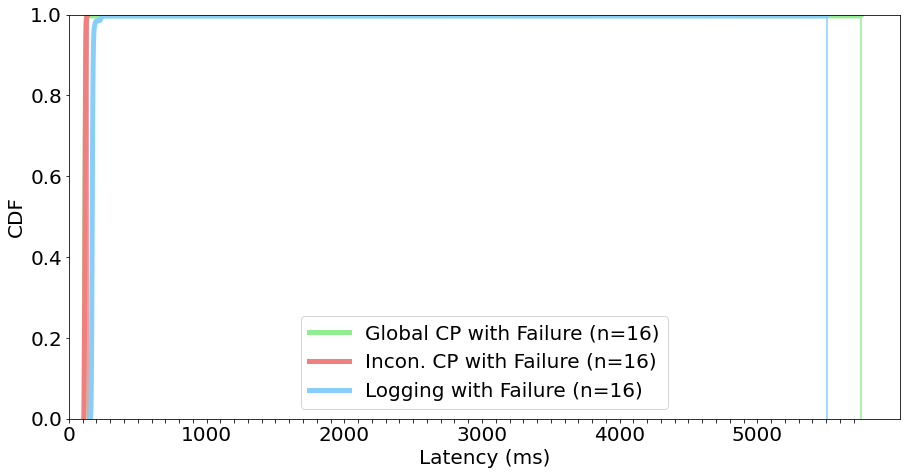

In [3]:
import matplotlib.pyplot as plt
from datetime import datetime

SAVE = False

font = {'size': 20}
plt.rc('font', **font)
plt.tight_layout()


index = 0
max_value = 0
LINESTYLES = ['solid','solid', 'solid','dotted','dotted', 'dotted'] #'dashed', 
COLORS = ['lightgreen','lightcoral','lightskyblue','lightgreen','lightskyblue',] #['tab:purple', 'tab:blue', 'tab:green'] 

def plot(curve, label):
    global index
    global max_value
    color = COLORS[index % len(COLORS)]
    linestyle = LINESTYLES[index % len(LINESTYLES)]

    n = np.arange(1,len(curve)+1) / np.float(len(curve))
    h, = plt.step(np.sort(curve), n, label=label, linewidth=5, linestyle=linestyle, color=color)
    max_value = max(max_value, max(curve))
    plt.axvline(max(curve), linestyle=linestyle, color=color)
    index += 1
    return h

def plot_all(num_nodes, zoom=False, save=False, legend=False):
    plt.figure(figsize=(13, 7))
    num_workers = num_nodes # * 8
#     plot(approx_nf[num_nodes], "Incon. CP (n={})".format(num_workers))
#     plot(gc_nf[num_nodes], "Global CP (n={})".format(num_workers))    
#     plot(exact_nf[num_nodes], "Logging (n={})".format(num_workers))
    
    plot(gc_1f[num_nodes], "Global CP with Failure (n={})".format(num_workers))
    plot(approx_1f[num_nodes], "Incon. CP with Failure (n={})".format(num_workers))
    plot(exact_1f[num_nodes], "Logging with Failure (n={})".format(num_nodes))

    plt.xlabel("Latency (ms)")
    plt.ylabel("CDF")
#     plt.xscale('log')

    if zoom:
        plt.ylim(0.95, 1)
        plt.yticks([i / 100 for i in range(95, 101)])
    else:
        plt.ylim(0, 1)
    plt.xlim(0)
    # plt.xscale('log')
#     plt.xticks([0,0.5,1])
    r = range(0, int(max_value), 100)
    if max_value > 1000:
        plt.xticks(r, [str(i) if i % 1000 == 0 else '' for i in r])
    else:
        plt.xticks(r)

    # plt.yticks([0.00, 0.50, 1.00])
    if legend:
        plt.legend()
    plt.tight_layout()

    if save:
        if zoom:
            name = "latency-zoom.pdf"
        else:
            name = "latency.pdf"
        plt.savefig(os.path.join(DIR, name))
    else:
        plt.show()

plot_all(16, zoom=False, save=SAVE, legend=True)
# plot_all(4, zoom=True, save=SAVE)